In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

In [4]:
data = pd.read_csv('Student_Performance.csv')
data

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [6]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


(10000, 6)

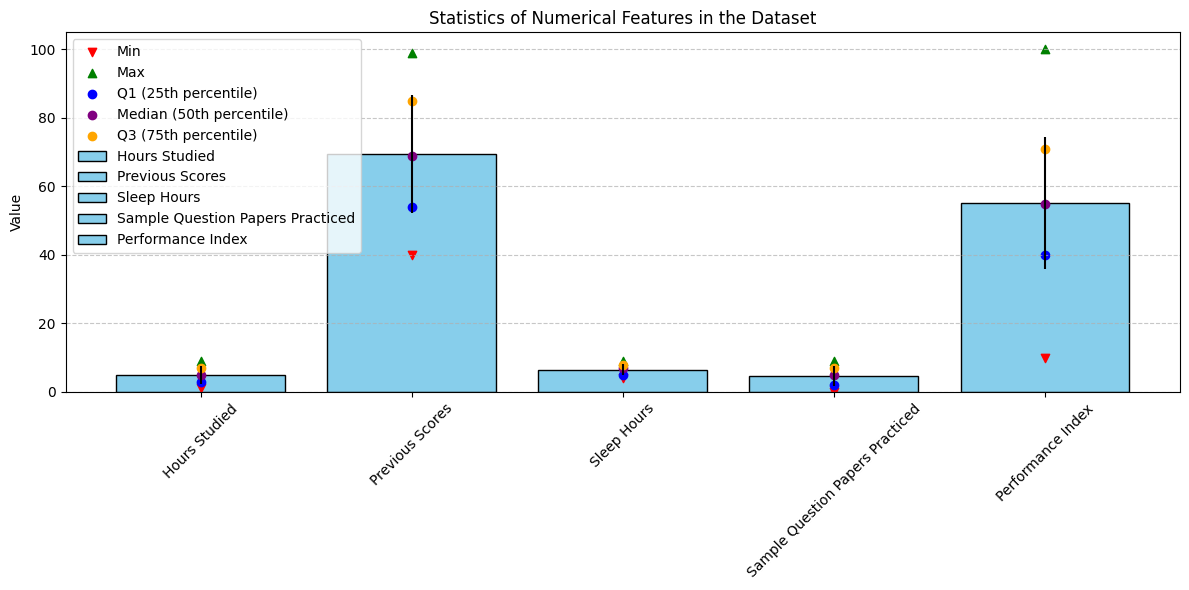

In [8]:
# Choose numerical columns
numeric_features = ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']
# Get statistics
feature_statistics = data[numeric_features].describe()

# Create a bar plot for means with error bars
fig, ax = plt.subplots(figsize=(12, 6))

# Plot mean with error bars for each feature
for feature in feature_statistics.columns:
    ax.bar(feature, feature_statistics.loc['mean', feature], yerr=feature_statistics.loc['std', feature], label=feature, color='skyblue', edgecolor='black')

# Add markers for min and max
ax.scatter(feature_statistics.columns, feature_statistics.loc['min'], color='red', marker='v', label='Min')
ax.scatter(feature_statistics.columns, feature_statistics.loc['max'], color='green', marker='^', label='Max')

# Add markers for quartiles
ax.scatter(feature_statistics.columns, data[numeric_features].quantile(0.25), color='blue', marker='o', label='Q1 (25th percentile)')
ax.scatter(feature_statistics.columns, data[numeric_features].quantile(0.5), color='purple', marker='o', label='Median (50th percentile)')
ax.scatter(feature_statistics.columns, data[numeric_features].quantile(0.75), color='orange', marker='o', label='Q3 (75th percentile)')

# Customize the plot
ax.set_title('Statistics of Numerical Features in the Dataset')
ax.set_ylabel('Value')
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.legend()

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
